Download the dataset;
Reading the dataset;
Dropping unnecessary columns;
Preprocessing: scaling, encoding, naN values, normalization;
Visualization: plot, heat map, boxplot, etc.;
Challenge and submit

In [1]:
import pandas as pd

file_path = 'C:/Users/ktang28/Mini_Project_Cancer/data.csv'
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df.columns
df = df.drop(['id'], axis = 1, inplace = True)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [26]:
df.columns.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [30]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
# Calculate the range for each numerical column
numerical_columns = df.select_dtypes(include='number').columns
ranges = df[numerical_columns].max() - df[numerical_columns].min()

# Display the ranges
print("Range for each numerical column:")
print(ranges)


Range for each numerical column:
radius_mean                  21.129000
texture_mean                 29.570000
perimeter_mean              144.710000
area_mean                  2357.500000
smoothness_mean               0.110770
compactness_mean              0.326020
concavity_mean                0.426800
concave points_mean           0.201200
symmetry_mean                 0.198000
fractal_dimension_mean        0.047480
radius_se                     2.761500
texture_se                    4.524800
perimeter_se                 21.223000
area_se                     535.398000
smoothness_se                 0.029417
compactness_se                0.133148
concavity_se                  0.396000
concave points_se             0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028945
radius_worst                 28.110000
texture_worst                37.520000
perimeter_worst             200.790000
area_worst                 4068.800000
smoothness_worst              0

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.area_mean
print(X)





0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64


In [48]:
scaler = StandardScaler()
X_reshaped = [[value] for value in X]

scaled_X = scaler.fit_transform(X_reshaped)    
print(scaled_X)  


[[ 9.84374905e-01]
 [ 1.90870825e+00]
 [ 1.55888363e+00]
 [-7.64463792e-01]
 [ 1.82622928e+00]
 [-5.05650454e-01]
 [ 1.09529491e+00]
 [-2.18964911e-01]
 [-3.84207273e-01]
 [-5.09063378e-01]
 [ 4.06453254e-01]
 [ 3.58672330e-01]
 [ 1.33135542e+00]
 [ 3.63507304e-01]
 [-2.17827270e-01]
 [ 1.11229904e-02]
 [ 8.42164276e-02]
 [ 4.09297356e-01]
 [ 1.72099748e+00]
 [-2.51956501e-01]
 [-3.83638452e-01]
 [-1.08357211e+00]
 [ 1.40814070e-01]
 [ 2.13054826e+00]
 [ 7.10203413e-01]
 [ 7.33240644e-01]
 [-2.86944462e-02]
 [ 1.24887645e+00]
 [ 2.20448943e-01]
 [ 8.53830595e-01]
 [ 1.23181183e+00]
 [-6.09460200e-01]
 [ 6.95129669e-01]
 [ 1.44227543e+00]
 [ 4.33187818e-01]
 [ 6.10375411e-01]
 [-6.22548570e-02]
 [-3.72830862e-01]
 [ 1.24887095e-01]
 [-2.72149630e-01]
 [-2.61342040e-01]
 [-8.07125332e-01]
 [ 1.27731747e+00]
 [-3.11967066e-01]
 [-3.50931272e-01]
 [ 1.19768260e+00]
 [-1.28834749e+00]
 [-3.42114554e-01]
 [-5.84716507e-01]
 [-2.67030245e-01]
 [-6.45580303e-01]
 [-2.36313937e-01]
 [-6.1799250

In [49]:
import numpy as np
mean_scaled_X = np.mean(scaled_X, axis=0)
variance_scaled_X = np.var(scaled_X, axis=0)
    
print("\nMean of scaled_X (should be close to 0):")
print(mean_scaled_X)
print("\nVariance of scaled_X (should be close to 1):")
print(variance_scaled_X)
    


Mean of scaled_X (should be close to 0):
[-2.18532476e-16]

Variance of scaled_X (should be close to 1):
[1.]


In [50]:
DG = df.iloc[:, 0].values
print(DG)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded_DG = encoder.fit_transform(DG) 
print(encoded_DG) 
   


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [52]:
df.drop(columns =['Unnamed: 32'], inplace = True)

In [53]:
df.to_csv('data_clean.csv', index=False)


Text(0.5, 0, 'Smoothness Mean')

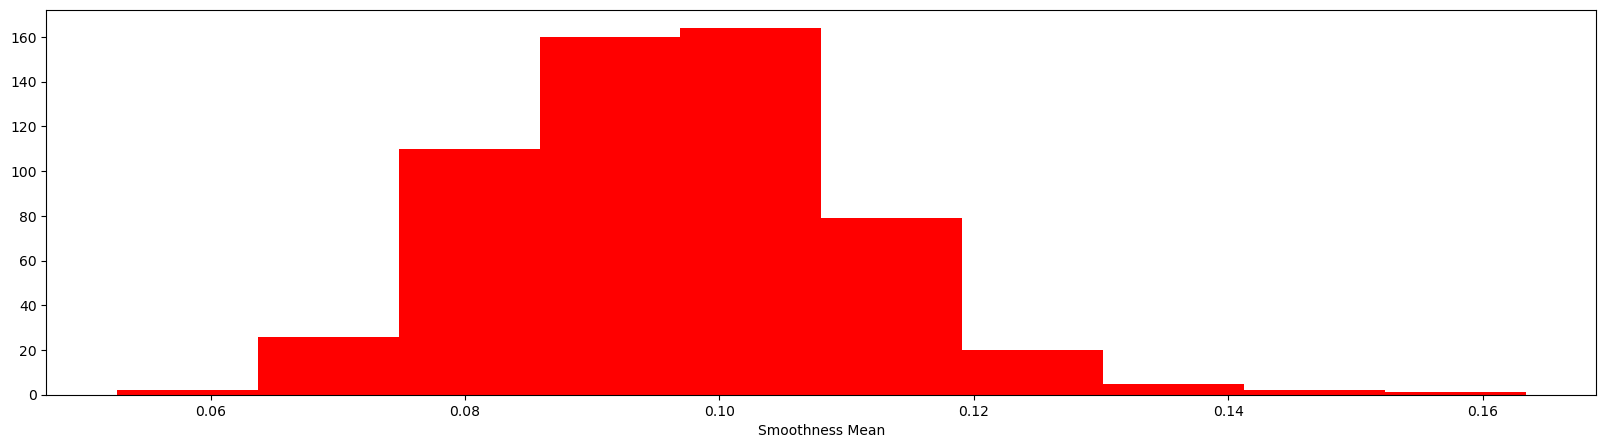

In [60]:
import matplotlib.pyplot as plt
s_mean = df.smoothness_mean.values

plt.figure(figsize=(20,5))
plt.hist(s_mean, bins = 10, color = 'red')

plt.xlabel("Smoothness Mean")


In [ ]:
import pandas as pd

file_path = 'C:/Users/ktang28/data_clean.csv'
df = pd.read_csv(file_path)
df.head()

import seaborn as sns
sns.pairplot(df)

In [ ]:
plt.show()

In [ ]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=.5)

# Show plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Using seaborn to create the box plots
sns.boxplot(data=df)

# Add title and labels
plt.title('Box Plot of Each Numerical Feature')
plt.xlabel('Features')
plt.ylabel('Values')

# Show plot
plt.show()